In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams["figure.dpi"] = 500
%matplotlib inline

In [6]:
excel_data = pd.ExcelFile(r"C:\Users\Shantanu\Downloads\EastWestAirlines.xlsx")

In [11]:
sheet_names = excel_data.sheet_names
sheet_names

['Description', 'data']

In [12]:
sheet_name = sheet_names[1]

In [17]:
df = excel_data.parse(sheet_name)
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [18]:
df.isna().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [19]:
df.duplicated().sum()

0

<Axes: >

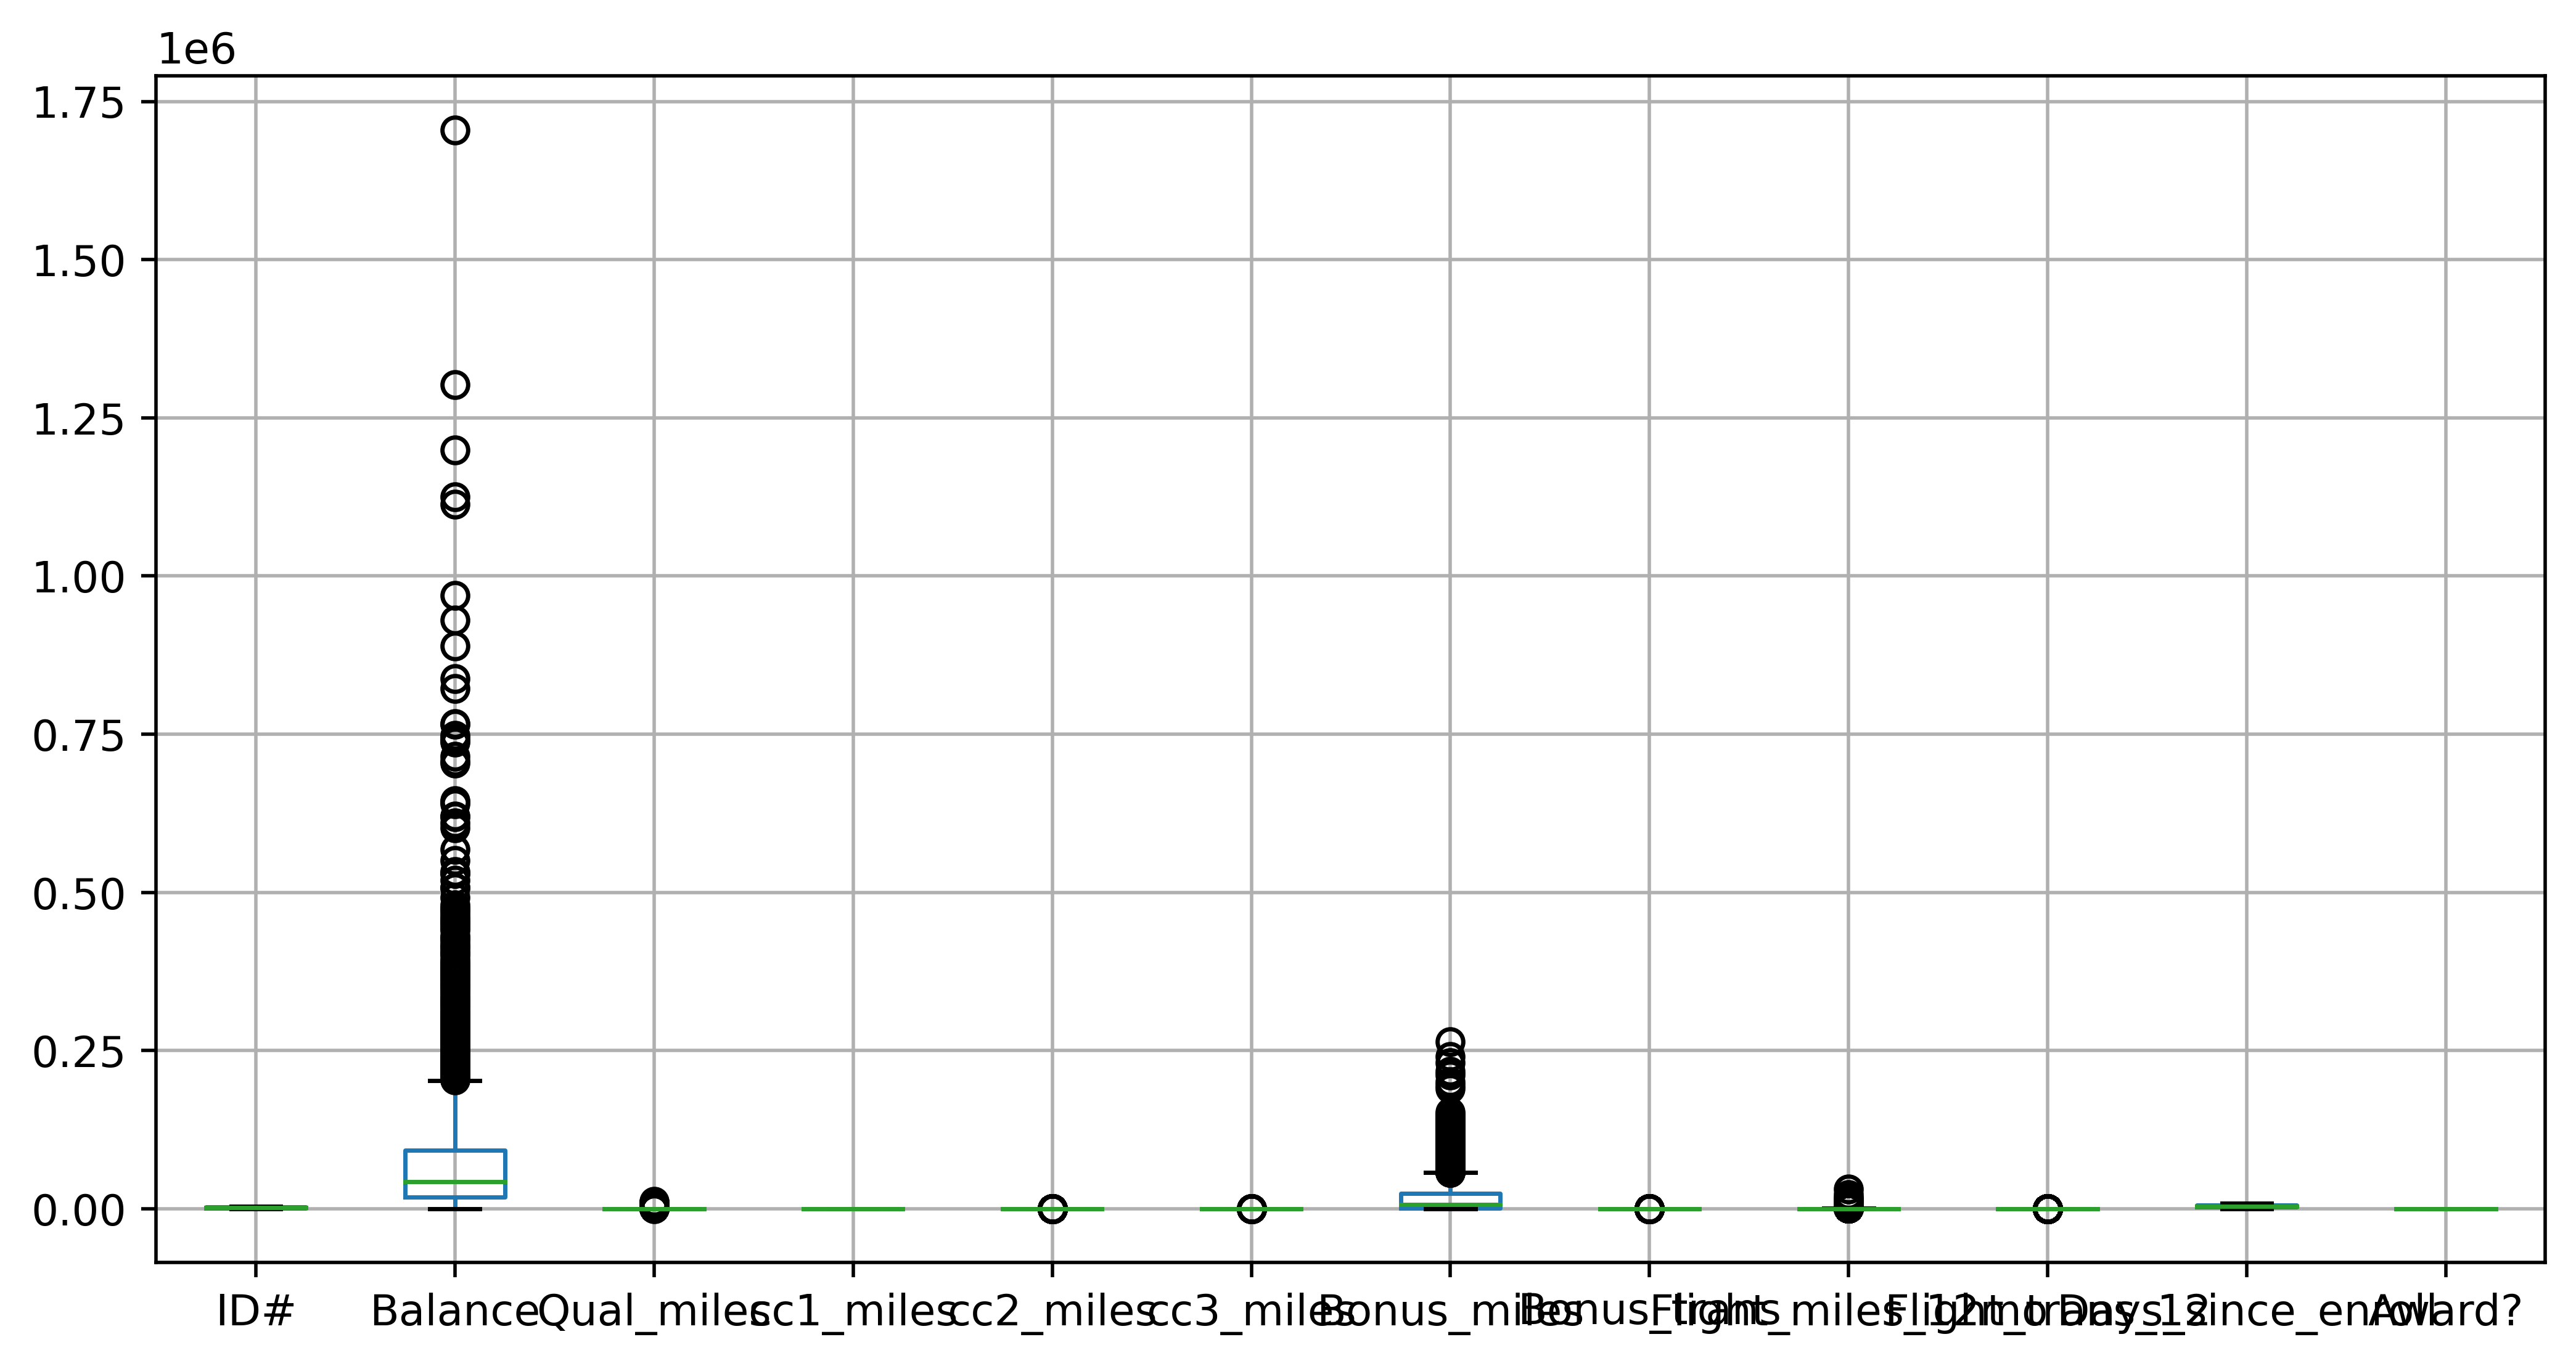

In [20]:
df.boxplot()

In [21]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [22]:
sc = StandardScaler()
x = sc.fit_transform(df)
x

array([[-1.73512503e+00, -4.51140783e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-1.73426342e+00, -5.39456874e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-1.73340181e+00, -3.20031232e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [ 1.72682006e+00, -4.29480975e-05, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [ 1.72768167e+00, -1.85606976e-01, -1.86298687e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [ 1.72854328e+00, -7.00507951e-01, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [23]:
db = DBSCAN(eps=0.5, min_samples=3)
ypred = db.fit_predict(x)
ypred

array([ 0,  0,  0, ..., 56,  0,  0])

In [24]:
silhouette_score(x,ypred)

-0.3478675429153123

In [25]:
from sklearn.neighbors import NearestNeighbors

In [26]:
neigh = NearestNeighbors(n_neighbors=3).fit(x)
neigh

NearestNeighbors(n_neighbors=3)

In [28]:
d, index = neigh.kneighbors(x)
d

array([[0.        , 0.13537867, 0.13743479],
       [0.        , 0.11407578, 0.13743479],
       [0.        , 0.21956162, 0.27251935],
       ...,
       [0.        , 0.19523778, 0.32719285],
       [0.        , 0.28917928, 0.33007337],
       [0.        , 0.02752204, 0.06504268]])

In [29]:
distance = np.sort(d[:,1])
distance

array([2.42270462e-03, 2.42270462e-03, 4.69027727e-03, ...,
       6.66765339e+00, 6.68121018e+00, 7.58357087e+00])

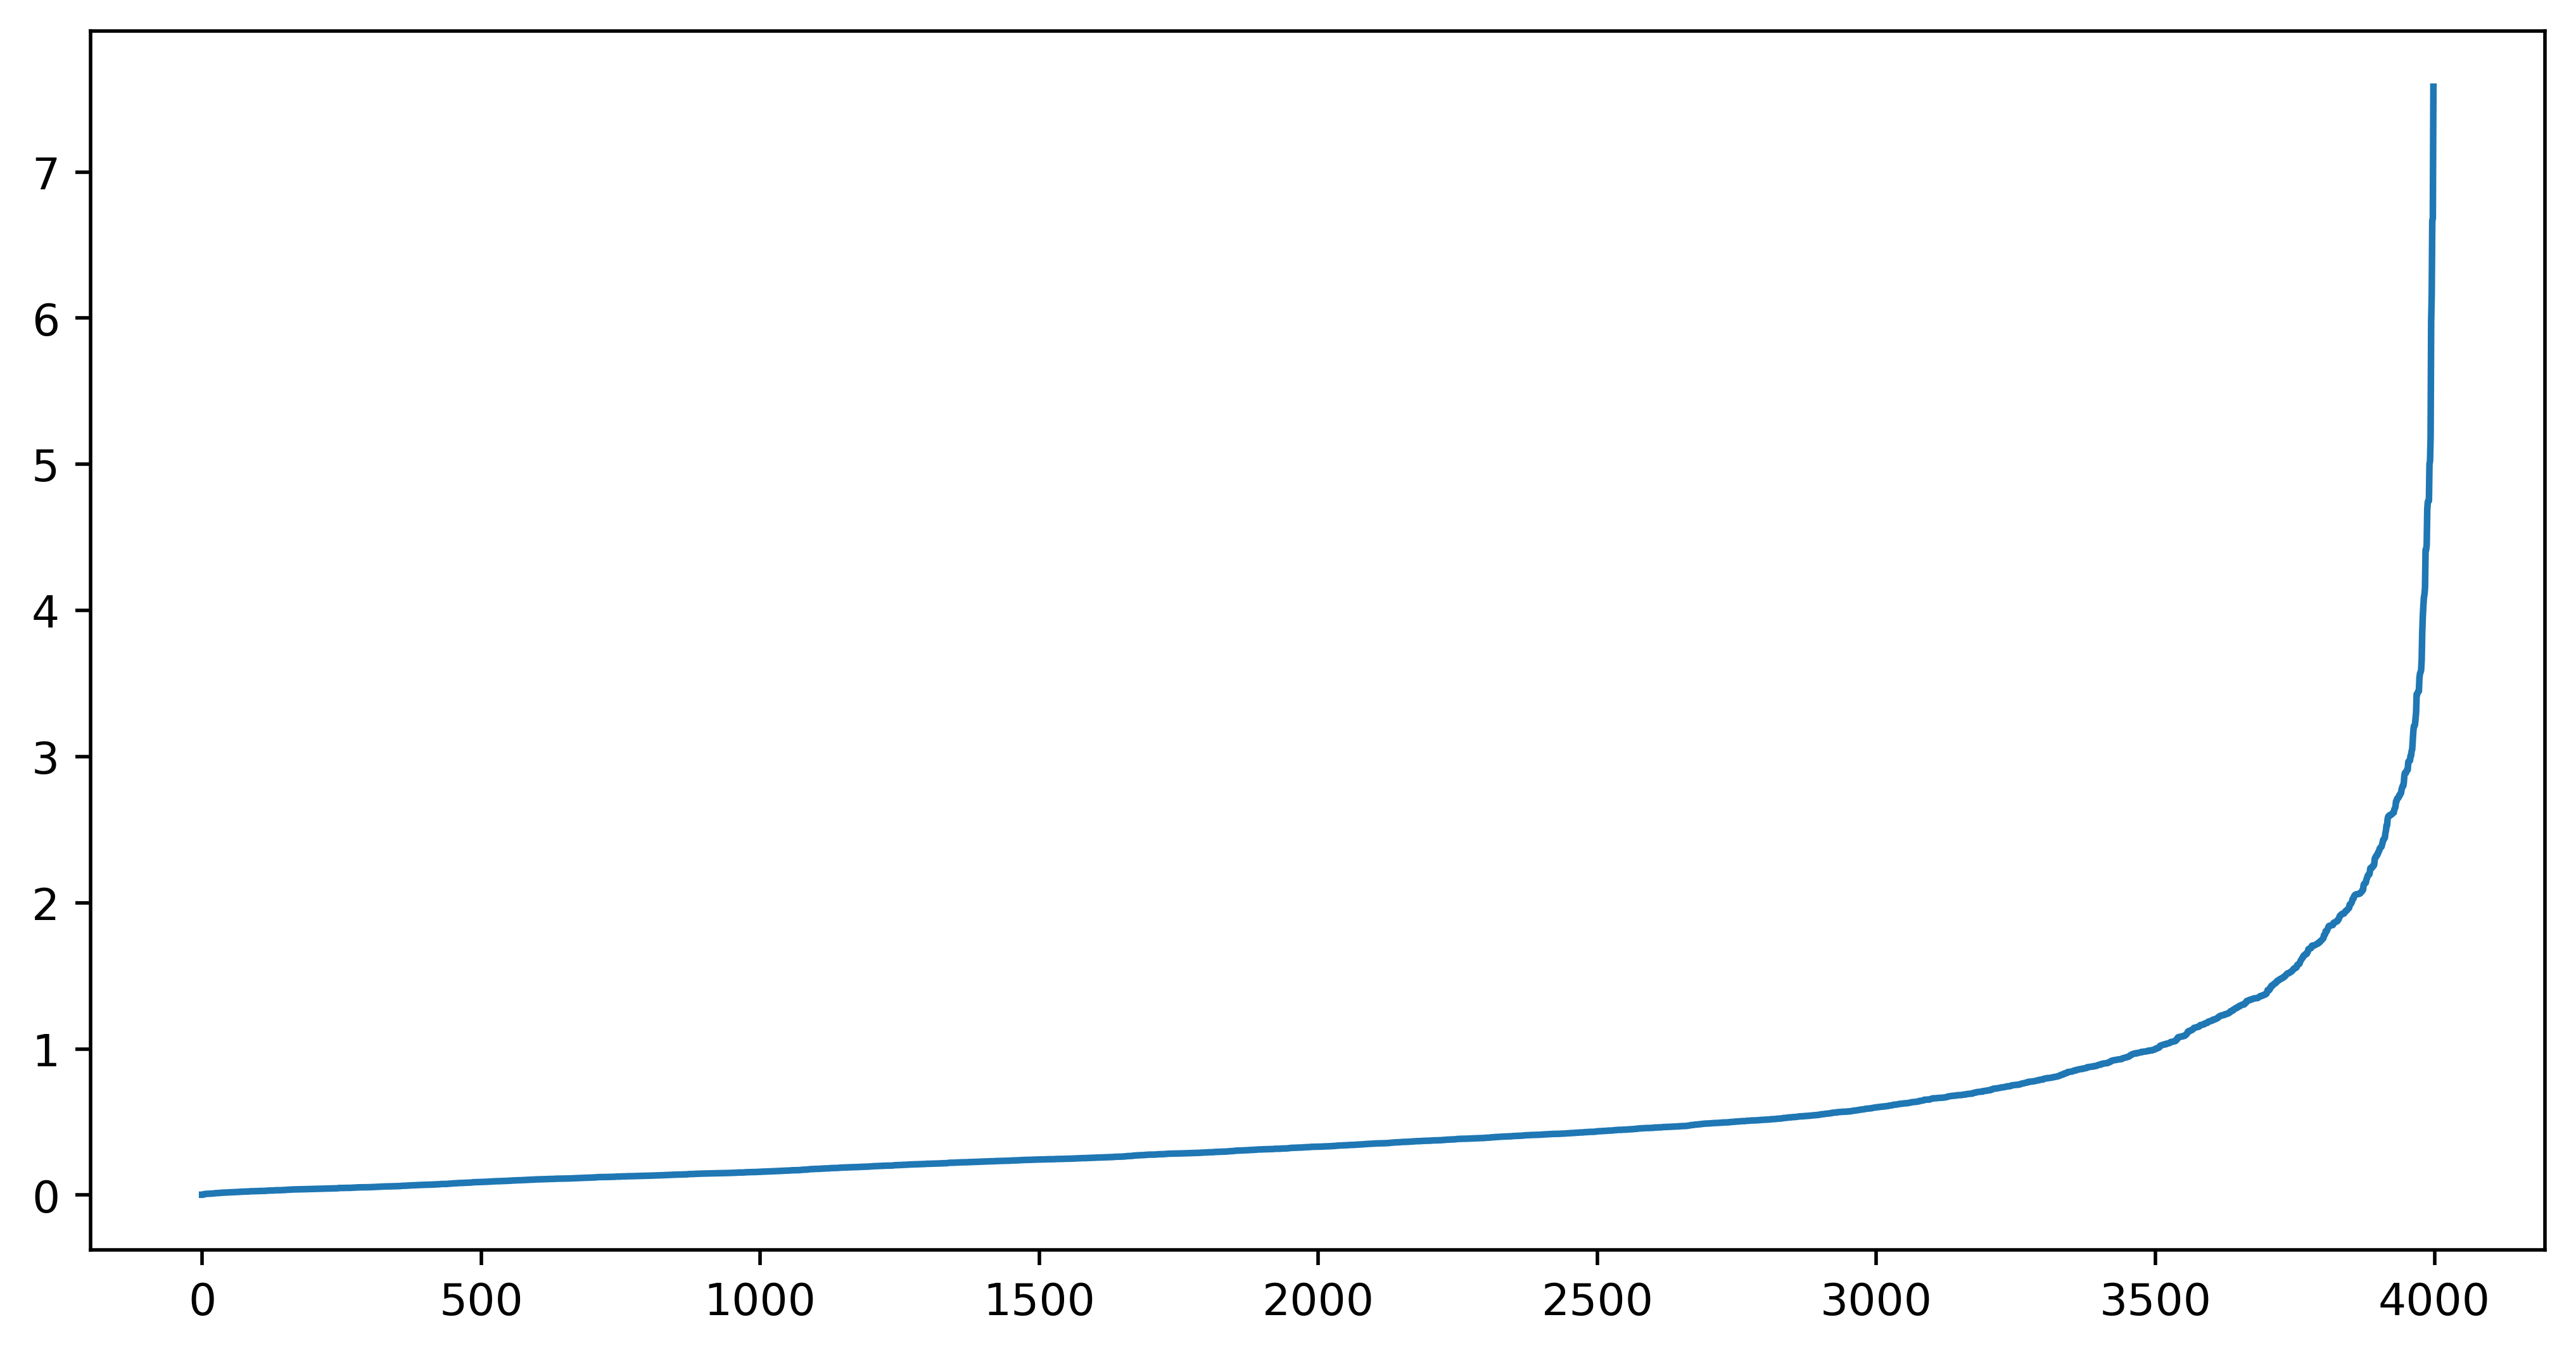

In [31]:
plt.plot(distance)

In [40]:
db = DBSCAN(eps=2.5, min_samples=3)
ypred = db.fit_predict(x)
ypred

array([0, 0, 0, ..., 0, 0, 0])

In [41]:
silhouette_score(x,ypred)

0.49701261582389844

In [42]:
df["Clusters"] = ypred

In [43]:
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0


In [45]:
df.groupby("Clusters").mean()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
Clusters,,,,,,,,,,,,
-1,1576.376344,278648.645161,1443.322581,3.000000,1.096774,1.430108,65420.193548,30.559140,5008.139785,13.247312,4989.387097,0.795699
0,2023.091097,68912.988354,110.288043,2.047101,1.000000,1.000000,16000.929089,11.107402,350.150880,1.086439,4098.892857,0.360507
1,2152.000000,41562.307692,0.000000,1.000000,3.000000,1.000000,16338.230769,16.076923,323.076923,0.923077,4133.384615,0.307692
2,2324.391304,39644.434783,0.000000,1.000000,2.000000,1.000000,8962.478261,13.739130,221.739130,0.782609,3846.304348,0.304348
3,2167.666667,117872.666667,0.000000,2.666667,1.000000,4.000000,71528.333333,23.666667,216.666667,0.333333,4189.333333,0.000000
4,1832.000000,110616.000000,5310.666667,1.000000,1.000000,1.000000,5817.666667,13.000000,3691.000000,10.666667,4405.666667,1.000000
